In [1]:
import os
import numpy as np
from PIL import Image
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D

In [2]:
choosen_index = [2, 3, 9, 11, 12, 13, 16, 17, 19, 27, 29, 31, 32, 37, 39, 45, 48, 49, 50, 56, 59, 61, 62, 63, 67]
print("Choosen index is:", choosen_index)

Choosen index is: [2, 3, 9, 11, 12, 13, 16, 17, 19, 27, 29, 31, 32, 37, 39, 45, 48, 49, 50, 56, 59, 61, 62, 63, 67]


In [3]:
X_train = []
X_test = []
y_train = []
y_test = []

for i in choosen_index:
    dir = os.listdir('PIE'+'/'+ str(i))
    Xi = []
    yi = []
    for idx in dir:
        img = np.array(Image.open('PIE'+'/'+ str(i) +'/'+ idx)) / 256
        Xi.extend(img.reshape(-1, 1024))
        yi.append(i)
    Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.3 )
    X_train.extend(Xi_train)
    X_test.extend(Xi_test)
    y_train.extend(yi_train)
    y_test.extend(yi_test)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape)

(2975, 1024)


In [4]:
Xm_train = []
Xm_test = []
ym_train = []
ym_test = []

# Set my photo label=0
dir = os.listdir('MYSELF')
Xi = []
yi = []
for idx in dir:
    img = np.array(Image.open('MYSELF'+'/'+ idx)) / 256
    Xi.extend(img.reshape(-1, 1024))
    yi.append(0)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(Xi, yi, test_size=0.3, shuffle=False)
Xm_train = np.array(Xm_train)
Xm_test = np.array(Xm_test)
ym_train = np.array(ym_train)
ym_test = np.array(ym_test)
print(Xm_train.shape)

(7, 1024)


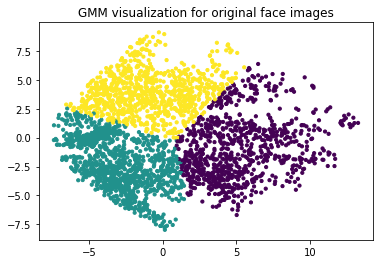

In [5]:
X_train_all = np.concatenate((X_train, Xm_train), axis=0)
X_test_all = np.concatenate((X_test, Xm_test), axis=0)
y_train_all = np.concatenate((y_train, ym_train), axis=0)
y_test_all = np.concatenate((y_test, ym_test), axis=0)

gmm = GaussianMixture(n_components=3)
y_predict = gmm.fit_predict(X_train_all)

pca2 = PCA(n_components=2)
X_2d_all = pca2.fit_transform(X_train_all)

plt.scatter(X_2d_all[:, 0], X_2d_all[:, 1], c=y_predict, s=10)
plt.title('GMM visualization for original face images')
plt.show()

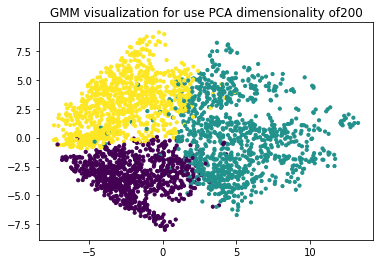

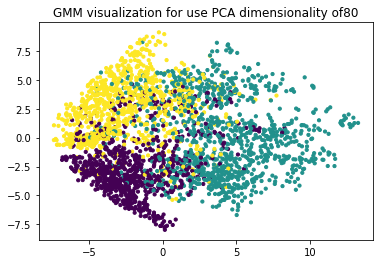

In [6]:
for i in [200, 80]:
    pca = PCA(n_components=i)
    X_new = pca.fit_transform(X_train_all)
    gmm = GaussianMixture(n_components=3)
    y_predict = gmm.fit_predict(X_new)

    pca2 = PCA(n_components=2)
    X_2d_all = pca2.fit_transform(X_new)

    plt.scatter(X_2d_all[:, 0], X_2d_all[:, 1], c=y_predict, s=10)
    plt.title('GMM visualization for use PCA dimensionality of'+ str(i))
    plt.show()